In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from vega_datasets import data

**1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [2]:
df= data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [4]:
#the date is alreary in datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df.shape

(8759, 2)

In [6]:
##the date is alreary in datetime64
#Set 'Date' column as Index and sort the index:

df = df.set_index('date').sort_index()

In [7]:
#Resample by the day
df.resample('D').mean().head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


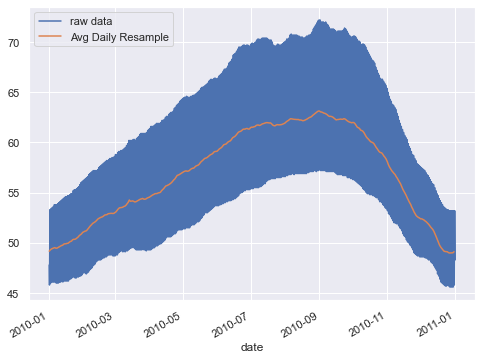

In [8]:
# Plot raw data with daily avg resampled data

df.temp.plot(label = 'raw data')
df.resample('D').mean().temp.plot(label = 'Avg Daily Resample')
plt.legend()

**2. Write the code necessary to visualize the minimum temperature over time.**

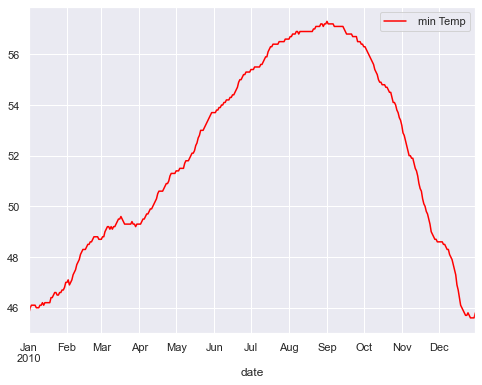

In [138]:
#df.temp.plot(label = 'raw data')
df.resample('D').min().temp.plot(label = ' min Temp',  color = 'red')
plt.legend()

**3. Write the code necessary to visualize the maximum temperature over time.**

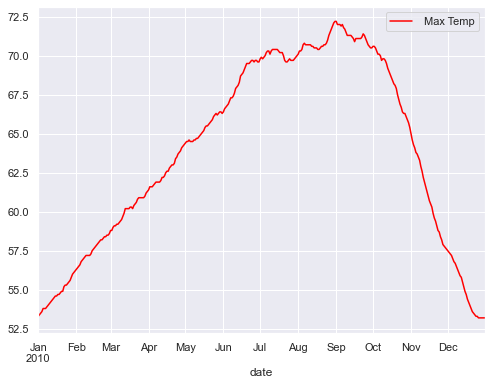

In [140]:
#df.temp.plot(label = 'raw data')
df.resample('D').max().temp.plot(label = ' Max Temp', color = 'red')
plt.legend()

**4. Which month is the coldest, on average?**

In [141]:
df.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


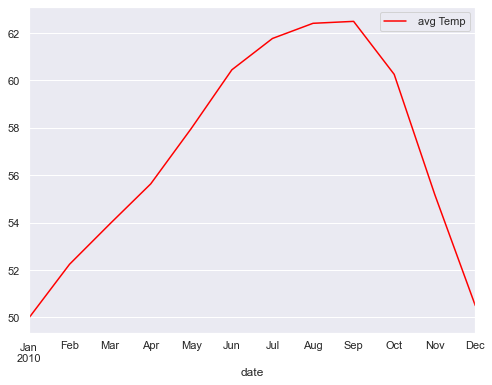

In [143]:
df.resample('M').mean().temp.plot(label = ' avg Temp', color = 'red')
plt.legend()

In [14]:
#we can get the min
df.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [116]:
#we can sort values to get the min
df.resample('M').mean().temp.sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

**5. Which month has the highest average temperature?**

In [38]:
df.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [16]:
df.resample('M').mean().nlargest(1, 'temp')

,temp
date,
2010-09-30,62.49


**6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

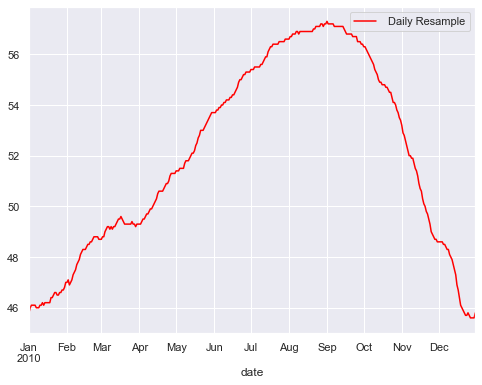

In [42]:
df.resample('D').min().temp.plot(label = ' Daily Resample', color = 'red')
plt.legend()

In [17]:
min_df = df.resample('D').min()
min_df.head()


,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10


In [19]:
max_df = df.resample('D').max()
max_df.head()

,temp
date,
2010-01-01,53.30
2010-01-02,53.40
2010-01-03,53.50
2010-01-04,53.60
2010-01-05,53.80


In [21]:
 diff_df = max_df['temp'] - min_df['temp']

pandas.core.series.Series

In [24]:
diff_df.resample('M').max()

date
2010-01-31    9.30
2010-02-28    9.90
2010-03-31   12.00
2010-04-30   13.00
2010-05-31   13.10
2010-06-30   14.80
2010-07-31   14.80
2010-08-31   15.00
2010-09-30   14.90
2010-10-31   14.40
2010-11-30   11.80
2010-12-31    8.90
Freq: M, Name: temp, dtype: float64

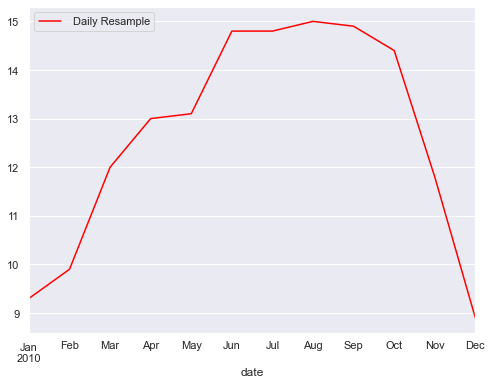

In [26]:
diff_df.resample('M').max().plot(label = ' Daily Resample', color = 'red')
plt.legend()

In [30]:
diff_df.idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

In [9]:
#other way
daily =  df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [10]:
# create a new column team difference (daily max - daily min)

daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [11]:
# Which month has the highest daily temperature variability?

daily.resample('M').max().temp_diff.sort_values()

date
2010-12-31    8.90
2010-01-31    9.30
2010-02-28    9.90
2010-11-30   11.80
2010-03-31   12.00
2010-04-30   13.00
2010-05-31   13.10
2010-10-31   14.40
2010-06-30   14.80
2010-07-31   14.80
2010-09-30   14.90
2010-08-31   15.00
Name: temp_diff, dtype: float64

**Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

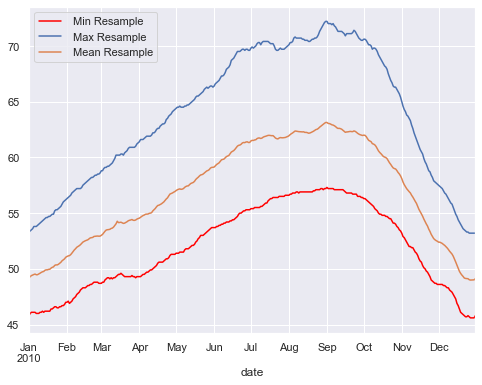

In [13]:
#df.temp.plot(label = 'raw data')
df.resample('D').min().temp.plot(label = ' Min Resample',  color = 'red')
df.resample('D').max().temp.plot(label = ' Max Resample')
df.resample('D').mean().temp.plot(label = ' Mean Resample')

plt.legend()
plt.show()

In [ ]:
#other way

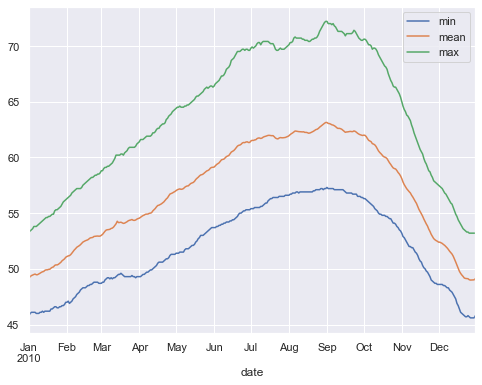

In [12]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.show()

**Use the dataset to answer the following questions:**

In [15]:
df_seattle = data.seattle_weather()

In [16]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [17]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [18]:
#date is tdatetime64 type
#set date as index and sort index
df_seattle = df_seattle.set_index('date').sort_index()

In [19]:
df_seattle.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain


- **Which year and month combination has the highest amount of precipitation?**

In [20]:
df_seattle.precipitation.resample('M').sum()

date
2012-01-31   173.30
2012-02-29    92.30
2012-03-31   183.00
2012-04-30    68.10
2012-05-31    52.20
2012-06-30    75.10
2012-07-31    26.30
2012-08-31     0.00
2012-09-30     0.90
2012-10-31   170.30
2012-11-30   210.50
2012-12-31   174.00
2013-01-31   105.70
2013-02-28    40.30
2013-03-31    69.70
2013-04-30   149.60
2013-05-31    60.50
2013-06-30    33.10
2013-07-31     0.00
2013-08-31    34.40
2013-09-30   156.80
2013-10-31    39.20
2013-11-30    96.30
2013-12-31    42.40
2014-01-31    94.00
2014-02-28   155.20
2014-03-31   240.00
2014-04-30   106.10
2014-05-31    80.00
2014-06-30    18.80
2014-07-31    19.60
2014-08-31    46.00
2014-09-30    56.70
2014-10-31   171.50
2014-11-30   123.10
2014-12-31   121.80
2015-01-31    93.00
2015-02-28   134.20
2015-03-31   113.50
2015-04-30    51.60
2015-05-31    14.80
2015-06-30     5.90
2015-07-31     2.30
2015-08-31    83.30
2015-09-30    21.10
2015-10-31   122.40
2015-11-30   212.60
2015-12-31   284.50
Freq: M, Name: precipitation, dtype

In [21]:
df_seattle.precipitation.resample('M').sum().nlargest(1)

date
2015-12-31   284.50
Freq: M, Name: precipitation, dtype: float64

- **Visualize the amount of monthly precipitation over time.**

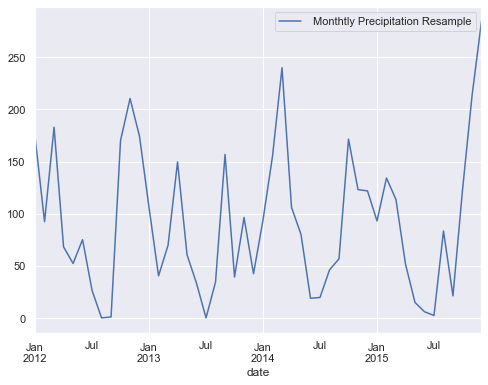

In [22]:
df_seattle.precipitation.resample('M').sum().plot(label = ' Monthtly Precipitation Resample')
plt.legend()
plt.show()

- **Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

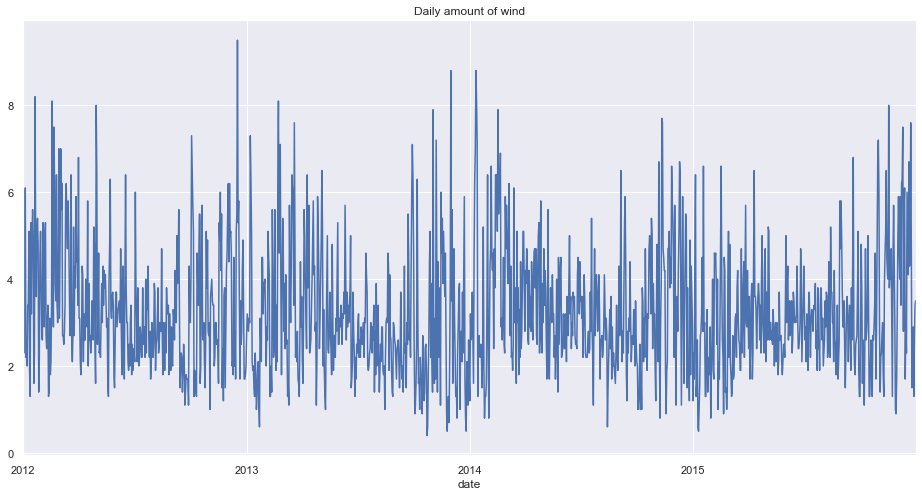

In [23]:
plt.figure(figsize=(16, 8))
df_seattle.wind.plot()
plt.title('Daily amount of wind')
plt.show()

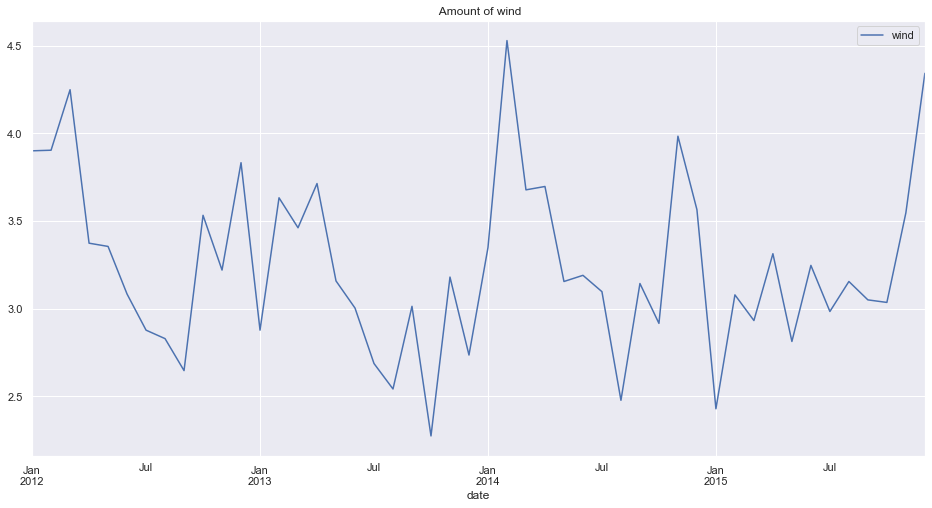

In [26]:
plt.figure(figsize=(16, 8))
df_seattle.wind.resample('M').mean().plot()
plt.legend()
plt.title(' Amount of wind')
plt.show()

- **Which year-month combination is the windiest?**

In [126]:
df_seattle.resample('M').mean().wind.nlargest(1)


date
2014-02-28   4.53
Freq: M, Name: wind, dtype: float64

- **What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [70]:
df_seattle.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain


In [28]:
df_seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [75]:
#add a condition to get only sun in weather
df_seattle[df_seattle.weather == 'sun'].resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


In [77]:
df_seattle[df_seattle.weather == 'sun'].resample('Y').count().nlargest(1, 'weather')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-12-31,211,211,211,211,211


In [29]:
#other way to do it
# make a new column 'is_sunny'
df_seattle['is_sunny'] = df_seattle.weather == 'sun'

In [31]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [32]:
# What's the sunniest year? 
df_seattle.resample('Y').is_sunny.mean()

date
2012-12-31   0.32
2013-12-31   0.56
2014-12-31   0.58
2015-12-31   0.49
Freq: A-DEC, Name: is_sunny, dtype: float64

- **In which month does it rain the most?**

In [79]:
# I'm going to use this condition df_seattle.weather == 'rain'
df_seattle[df_seattle.weather == 'rain'].resample('M').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,18,18,18,18,18
2012-02-29,17,17,17,17,17
2012-03-31,19,19,19,19,19
2012-04-30,19,19,19,19,19
2012-05-31,16,16,16,16,16
2012-06-30,19,19,19,19,19
2012-07-31,12,12,12,12,12
2012-08-31,2,2,2,2,2
2012-09-30,4,4,4,4,4


In [86]:
df_seattle[df_seattle.weather == 'rain'].resample('M').count().nlargest(1, 'weather')[['weather']]

,weather
date,
2012-11-30,25


In [33]:
#other way
df_seattle['month'] = df_seattle.index.month

df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1


In [34]:
# total rainfall by month
df_seattle.groupby('month').precipitation.sum().sort_values()

month
7     48.20
6    132.90
8    163.70
5    207.50
9    235.50
4    375.40
2    422.00
1    466.00
10   503.40
3    606.20
12   622.70
11   642.50
Name: precipitation, dtype: float64

- **Which month has the most number of days with a non-zero amount of precipitation?**

In [35]:
#the condition  df_seattle.precipitation > 0
df_seattle[df_seattle.precipitation >0].resample('M').precipitation.count().nlargest(1)

date
2012-12-31    27
Freq: M, Name: precipitation, dtype: int64

In [36]:
df_seattle[['precipitation']][df_seattle.precipitation > 0].resample('M').count().nlargest(1, 'precipitation')

,precipitation
date,
2012-12-31,27


In [ ]:
#other way

In [37]:
# did it rain?
df_seattle['did_rain'] = df_seattle.precipitation > 0

In [38]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,did_rain
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1,True


In [40]:
# Which month has the most number of days with a non-zero amount of precipitation?

df_seattle.groupby('month').did_rain.mean().sort_values().tail(5)

month
1    0.53
3    0.59
11   0.59
2    0.65
12   0.65
Name: did_rain, dtype: float64

### flights dataset

In [41]:
flights_df = data.flights_20k()

In [42]:
flights_df.head(2)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP


In [43]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [44]:
#date is tdatetime64 type
#set date as index and sort index
flights_df = flights_df.set_index('date').sort_index()

In [45]:
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


- **Convert any negative delays to 0.**

In [46]:
flights_df.delay = np.where (flights_df.delay <0 , 0 , flights_df.delay)

In [47]:
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [49]:
# other way
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x
# use the function (.apply)

flights_df.delay = flights_df.delay.apply(delay_to_zero)

In [ ]:
#to get the time for doing
# use the function (.apply)

%timeit flights_df.delay = flights_df.delay.apply(delay_to_zero)

In [50]:
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


- **Which hour of the day has the highest average delay?**

- **Does the day of the week make a difference in the delay amount?**

- **Does the month make a difference in the delay amount?**